# First Project (Linear Regression)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
data = pd.read_csv('customer.csv')


x_data = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]


scaler = StandardScaler()            # Create scaler instance 
x = scaler.fit_transform(x_data)  # Fit to data & transform it ( this is still a doubt )
y = data['Yearly Amount Spent']

In [26]:
print(data.info())
# initializing all of the variables y = w.x + b
w = np.array([100, 100,  100, 100]) # why does it still depend on the initial values ? 
b = 300
alpha = 0.001

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [27]:
def gradDesJw( m = 500 ,w = w , b = b , x = x , y = y ):
    Jw = np.zeros(4)
    for feature in range(4):
        for i in range(500):
            Jw[feature] += (np.dot(w,x[i]) + b - y[i])*x[i][feature]

    return Jw/m;

def gradDesJb(m = 500 ,w = w , b = b , x = x , y = y ):
    Jb = 0
    for i in range(500):
        Jb += (np.dot(w,x[i]) + b - y[i])

    return Jb/m;



In [28]:
t = 1000
while(t>=0):
    w_des = alpha * gradDesJw()
    b_des = alpha * gradDesJb()
    w = w - w_des 
    
    b = b - b_des
    t = t - 1
    print(w[0] , w[1] , w[2] , w[3] , b)
    print(t)

99.92839212217116 99.93119396383148 99.89980879607188 99.95992726881065 300.1993140382586
999
99.85678424434232 99.86238792766295 99.79961759214376 99.91985453762129 300.3986280765172
998
99.78517636651348 99.79358189149443 99.69942638821564 99.87978180643194 300.5979421147758
997
99.71356848868464 99.7247758553259 99.59923518428752 99.83970907524258 300.79725615303437
996
99.6419606108558 99.65596981915738 99.4990439803594 99.79963634405323 300.99657019129296
995
99.57035273302697 99.58716378298885 99.39885277643128 99.75956361286387 301.19588422955155
994
99.49874485519813 99.51835774682033 99.29866157250316 99.71949088167452 301.39519826781014
993
99.42713697736929 99.4495517106518 99.19847036857504 99.67941815048516 301.59451230606874
992
99.35552909954045 99.38074567448328 99.09827916464693 99.63934541929581 301.79382634432733
991
99.28392122171161 99.31193963831475 98.9980879607188 99.59927268810645 301.9931403825859
990
99.21231334388277 99.24313360214623 98.89789675679069 99.55

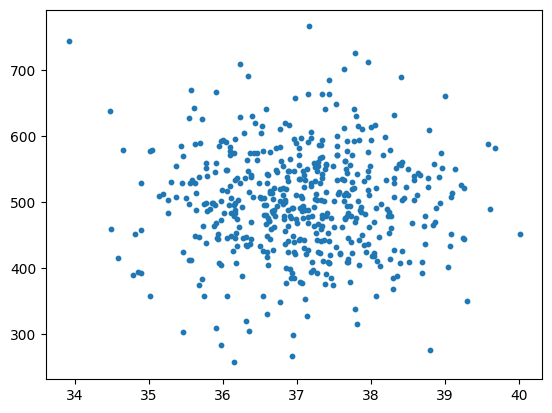

In [29]:
plt.scatter(data['Time on Website'],data['Yearly Amount Spent'] ,s=10)
plt.show()

503.5696657500598
492.6060127179966


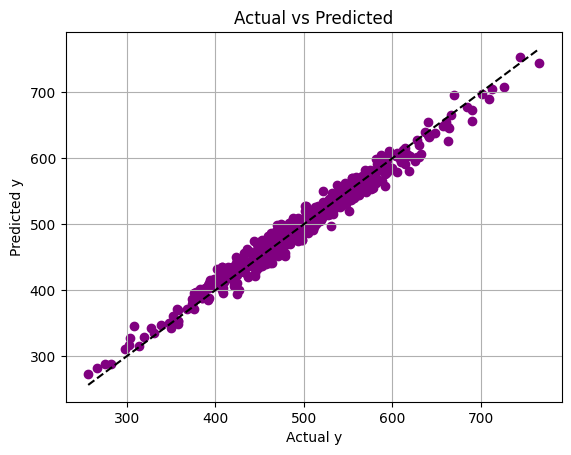

In [30]:
y_pred = np.dot(x, w) + b

print(y_pred[10])
print(y[10])

plt.scatter(y, y_pred, color='purple')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # y = x line
plt.grid(True)
plt.show()



In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))


MSE: 165.21947005627294
MAE: 10.429698239761027
R² Score: 0.9736838460308248


In [32]:
# checking coeficients using sickit learn 
x_data = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']
x_train , y_train , x_test , y_test = train_test_split(x_data,y,test_size=0.3,random_state=42)
lm = LinearRegression()
lm.fit(x_data,y)

LinearRegression()

In [33]:
lm.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])